# **GELİŞMİŞ AĞAÇ YÖNTEMLERİ**

## **🌳 Random Forests (Rastgele Ormanlar)🌳**

* **Temeli birden çok karar ağacının ürettiği tahminlerin bir araya getirilerek değerlendirilmesine dayanır.** 

* **Bagging (topluluk öğrenme yöntemleri) (Breiman, 1996) ile Random Subspace (Ho, 1998) yöntemlerinin birleşimi ile oluşmuştur.**

* **Ağaçlar için *gözlemler* <u>bootstrap rastgele örnek seçim yöntemi</u> ile *değişkenler* random subspace yöntemi ile seçilir**

* **Karar ağacının her bir düğümünde en iyi dallara ayırıcı (bilgi kazancı) değişken tüm değişkenler arasından *rastgele* seçilen daha az sayıdaki değişken arasından seçilir.**

* **Ağaç oluşturmada veri setinin 2/3'ü kullanılır. Dışarıda kalan veri ağaçların performans değerlendirmesi ve değişken öneminin belirlenmesi için kullanılır.**

* **Her düğüm noktasında rastgele değişken seçimi yapılır (regresyon'da p/3, sınıflandırma'da karekök p).**

### **Bagging (Torbalama) & Boosting (Arttırma)** 
 
*  **İki yöntemde teknik olarak aşırı öğrenme ve model performanslarını arttırmaya yönelik ortaya çıkan yaklaşımlardır.**

**Bagging**

* **Bagging (Torbalama) algoritması, L. Breiman tarafından önerilen topluluk sınıflandırması için bir yöntemdir. Bagging terimi, Bootstrap (Önyükleme) ve Aggregating (Toplama/Birleştirme) teriminin birleşiminden oluşan kısaltılmış bir ifadedir.**

* **Herhangi bir tekli ağacı bootstrap (ratsgele) örneklem yöntemiyle tekrar tekrar oluşturarak, rastgelelik kazandırarak tahminlerde bulunur.** 

* **Bagging algoritmasına göre Bootstrap yöntemini kullanarak örnekleme yoluyla eğitim veri kümesinden 𝑘 adet alt küme oluşturur. Daha sonra her bir alt kümeye olacak şekilde 𝑘 adet sınıflandırıcı oluşturulur. Sınıflandırıcılar en son toplanarak tek bir yerde birleştirilir. Algoritmanın tahmin adımı ise farklı 𝑘 öğrenici için çoğunluk oylamasına göre tahmin edilmektedir.**

**Boosting**

* **Boosting yeni veriyi sıralı şekilde oluşturur.**

* **Boosting algoritmalarında ağaçlar birbirlerine *bağlı* ve her bir sınıflandırıcı, önceki sınıflandırıcıların başarısı dikkate alınarak eğitilir.**

* **Her bir eğitimden sonra ağırlıklar yeniden paylaştırılır. Yanlış sınıflandırılmış verilerin ağırlıklarını arttırır. En iyi güçlendirme teknikleri AdaBoost, Gradient Boosting ve XgBoost vb.**

### **Kütüphanelerin Kurulumu**

In [1]:
!pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 76.6 MB 1.2 MB/s 


In [2]:
!pip install xgboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
!pip install lightgbm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.model_selection import GridSearchCV, cross_validate, RandomizedSearchCV, validation_curve

from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

pd.set_option('display.max_columns', None)
pd.set_option('display.width', 500)

warnings.simplefilter(action='ignore', category=Warning)

In [5]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [6]:
df = pd.read_csv("/content/gdrive/MyDrive/DSMLBC10/week_11 (08.12.22-14.12.22) ml/dataset/diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [7]:
y = df["Outcome"]
X = df.drop(["Outcome"], axis=1)

### **Random Forests Uygulama**

In [8]:
rf_model = RandomForestClassifier(random_state=17)
rf_model.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 17,
 'verbose': 0,
 'warm_start': False}

In [9]:
cv_results = cross_validate(rf_model, X, y, cv=10, scoring=["accuracy", "f1", "roc_auc"])
cv_results['test_accuracy'].mean()

0.753896103896104

In [10]:
cv_results['test_f1'].mean()

0.6190701534636385

In [11]:
cv_results['test_roc_auc'].mean()

0.8233960113960114

* **'n_estimators': 100, fit edilecek bağımsız ağaç sayısını temsil etmektedir. Burada 100 çıkmış fakat, model belki 500 olduğunda daha iyi çalışacak bunun içinde GridSearch ü kullanman gerekir.** 

* **GRID - ön tanımlı değerleri girildi. Çünkü çalışmanın başında elde edilecek hatadan daha kötü bir hata istenilmiyor.**

In [12]:
rf_params = {"max_depth": [5, 8, None],
             "max_features": [3, 5, 7, "auto"], # bölünmelerde göz önünde bulundurulması gereken değişken sayısı, verideki değişken sayısından fazla olmamalı
             "min_samples_split": [2, 5, 8, 15, 20], # bir düğümün dallanmaya maruz bırakılıp bırakılmamaya göre kaç tane gözlem birimi olması gerektiğidir
             "n_estimators": [100, 200, 500]} # fit edilecek birbirinden bağımsız ağaç sayısı

* **Hiperparametre optimizasyonu sonrası elde edilen hatanın daha düşük olması beklenir. Düşük değilse, rastgelelikle ilgili olabilir ya da ön tanımlı argümanları arama setinde bulundurmuyor olman olabilir.**

In [13]:
rf_best_grid = GridSearchCV(rf_model, rf_params, cv=5, n_jobs=-1, verbose=True).fit(X, y)

Fitting 5 folds for each of 180 candidates, totalling 900 fits


In [14]:
rf_best_grid.best_params_

{'max_depth': None,
 'max_features': 5,
 'min_samples_split': 8,
 'n_estimators': 500}

* **Random Forest'ın da ön tanımlı değerlerinin yeteri kadar iyi olmadığı dışarıdan müdahale edilmesi gerektiği gözlemlenmiştir.**

In [15]:
rf_final = rf_model.set_params(**rf_best_grid.best_params_, random_state=17).fit(X, y)

In [16]:
cv_results = cross_validate(rf_final, X, y, cv=10, scoring=["accuracy", "f1", "roc_auc"])
cv_results['test_accuracy'].mean()

0.766848940533151

In [17]:
cv_results['test_f1'].mean()

0.6447777811143756

In [18]:
cv_results['test_roc_auc'].mean()

0.8271054131054132

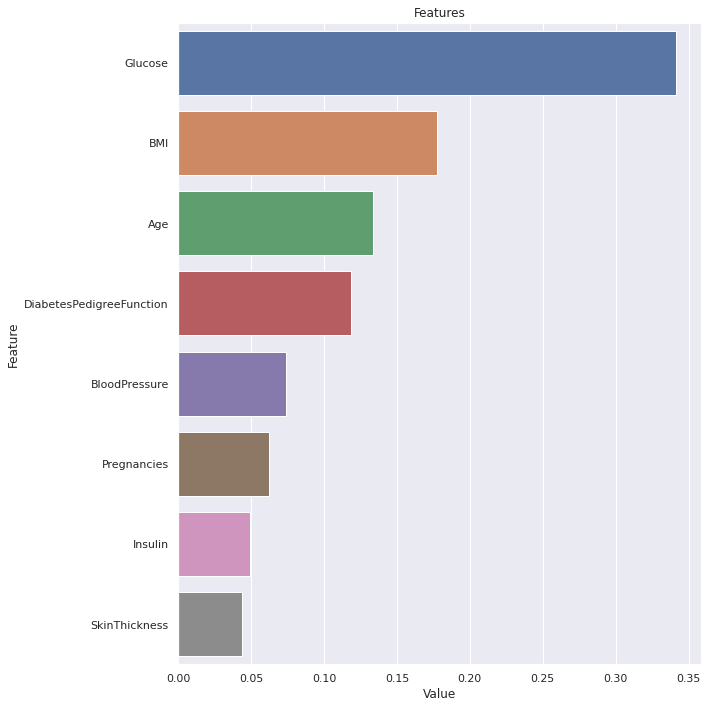

In [19]:
def plot_importance(model, features, num=len(X), save=False):
    feature_imp = pd.DataFrame({'Value': model.feature_importances_, 'Feature': features.columns})
    plt.figure(figsize=(10, 10))
    sns.set(font_scale=1)
    sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value",
                                                                     ascending=False)[0:num])
    plt.title('Features')
    plt.tight_layout()
    plt.show()
    if save:
        plt.savefig('importances.png')

plot_importance(rf_final, X)

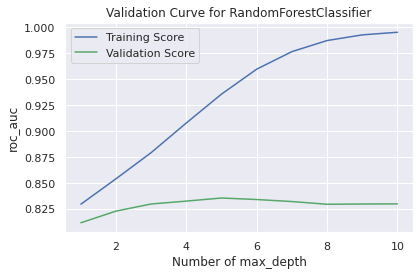

In [20]:
def val_curve_params(model, X, y, param_name, param_range, scoring="roc_auc", cv=10):
    train_score, test_score = validation_curve(
        model, X=X, y=y, param_name=param_name, param_range=param_range, scoring=scoring, cv=cv)

    mean_train_score = np.mean(train_score, axis=1)
    mean_test_score = np.mean(test_score, axis=1)

    plt.plot(param_range, mean_train_score,
             label="Training Score", color='b')

    plt.plot(param_range, mean_test_score,
             label="Validation Score", color='g')

    plt.title(f"Validation Curve for {type(model).__name__}")
    plt.xlabel(f"Number of {param_name}")
    plt.ylabel(f"{scoring}")
    plt.tight_layout()
    plt.legend(loc='best')
    plt.show(block=True)

val_curve_params(rf_final, X, y, "max_depth", range(1, 11), scoring="roc_auc")

### **🌳 GBM (Gradient Boosting Machines) 🌳**

**Artık optimizasyonuna göre çalışan bir ağaç yöntemidir. GBM in temelleri AdaBoost (Adaptive Boosting) a dayanır. AdaBoost: Zayıf sınıflandırıcıların bir araya gelerek güçlü bir sınıflandırıcı oluşturması fikrine dayanır (1996-1999).**

▶ https://cseweb.ucsd.edu/~yfreund/papers/IntroToBoosting.pdf

* **GBM: Hatalar/Artıklar üzerine *tek* bir tahminsel model formunda olan modeller serisi kurulur (2001 Friedman).**

▶ https://jerryfriedman.su.domains/ftp/trebst.pdf

* **Ağaç yöntemlerine Boosting + Gradient Descent uygulanmasıdır.**

* **Gradient Boosting tek bir tahminsel model formunda olan modeller serisi oluşturur.**

* **Seri içerisindeki bir model serisindeki bir önceki modelin tahmin artıklarının/hatalarının (residuals) üzerine kurularak (fit) oluşturur.**

* **GBM diferensiyellenebilen herhangi bir kayıp fonksiyonunu optimize edebilen Gradient Descent algoritmasını kullanmaktadır.**

* **Tek bir tahminsel model formunda olan modeller serisi additive şekilde kurulur.**

### **Additive Modeling**

* **Ağaç yöntemlerinde şekli belli oranlara bölüyoruz, bu bölme işlemini daha hassaslaştırarak yapmak istersek additive model kullanıyoruz.** 



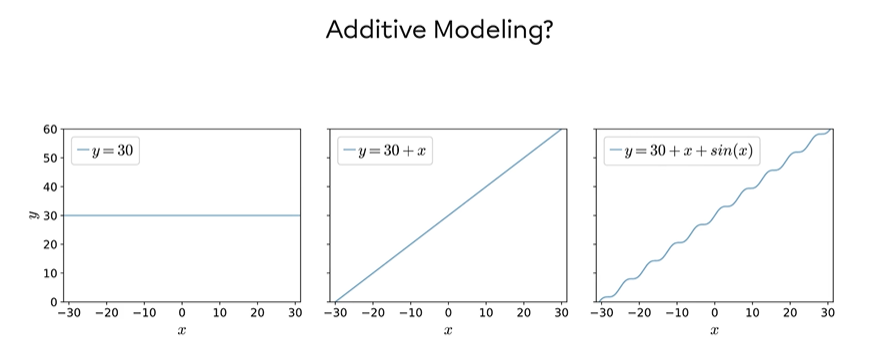

* **Yukarıdaki ilk grafik sabit bir fonksiyon grafiğidir. Bu fonksiyon biçimlendirmek istenirse ikinci grafikte görüldüğü gibi "x" eklenebilir. Daha da detaylandırarak daha iyi  bir yaklaşım sağlanmak istenirse kare, küp alma işlemleri yapılabilir, cosx, sinx gibi fonksiyonlar eklenebilir...**

* **Amaç : Sabit değere additive (ekleme) yapılarak (ki bunlar artıklar olacak), daha başarılı tahminler elde etmektir. Şimdi üzerinde çalışılabilecek bir tahmin sonucu var, bunun üzerine bir şeyler ekleyerek/çıkararak optimum sonuca gidilmeye çalışılacaktır.**

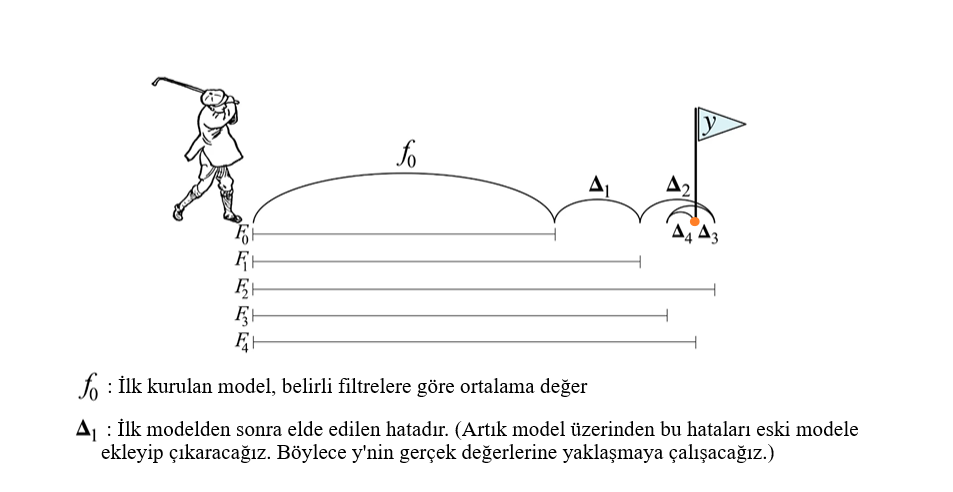

## **Örnekle pekiştirmeye çalışalım.**

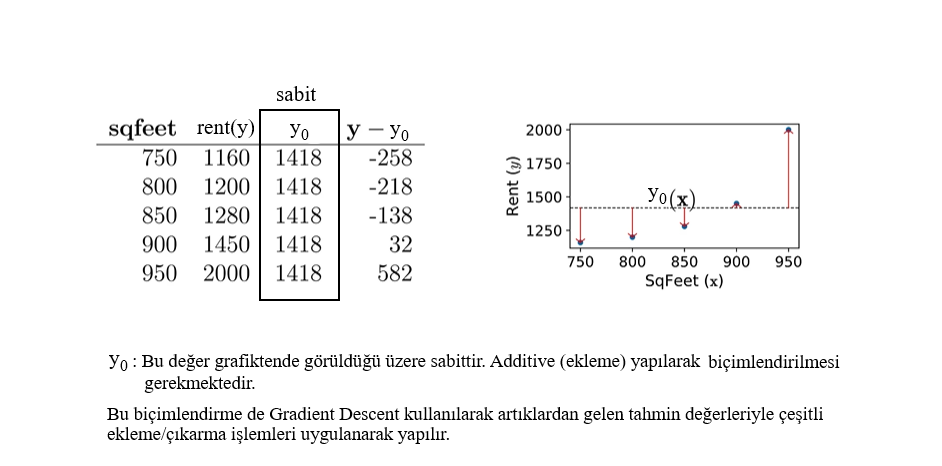

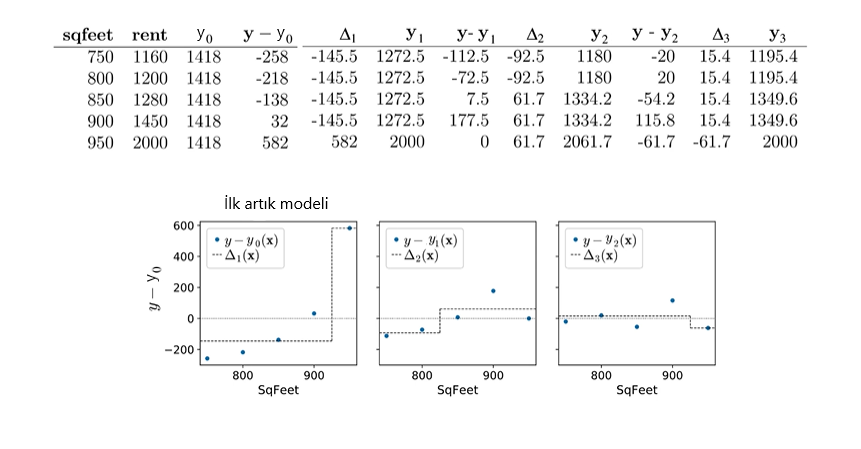

* **Artıklar, optimize edilerek hatalar küçültülmüştür. İteratif bir şekilde eski tahmin sonuçlarının üzerine bir şeyler eklenerek artıkların yukarıdaki şekilde görüldüğü gibi modellenmesiyle tahmin başarısı arttırılmıştır.**

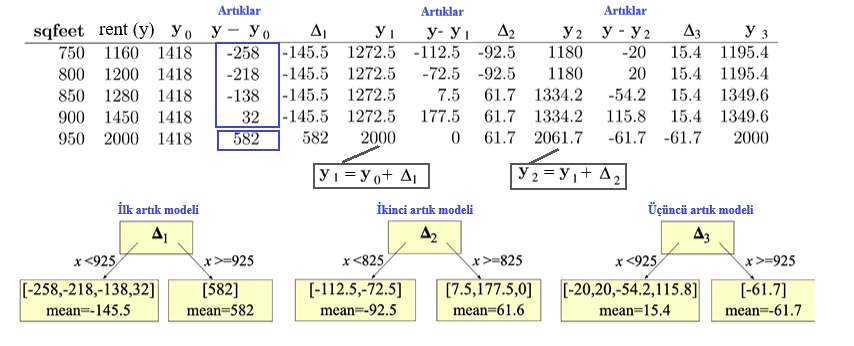

### **Gradient Boosting Uygulama** 

In [21]:
gbm_model = GradientBoostingClassifier(random_state=17)

gbm_model.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'deviance',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'random_state': 17,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [22]:
cv_results = cross_validate(gbm_model, X, y, cv=5, scoring=["accuracy", "f1", "roc_auc"])
cv_results['test_accuracy'].mean()

0.7591715474068416

In [23]:
cv_results['test_f1'].mean()

0.634235802826363

In [24]:
cv_results['test_roc_auc'].mean()

0.8254867225716283

In [25]:
gbm_params = {"learning_rate": [0.01, 0.1],
              "max_depth": [3, 8, 10],
              "n_estimators": [100, 500, 1000],
              "subsample": [1, 0.5, 0.7]}

In [26]:
gbm_best_grid = GridSearchCV(gbm_model, gbm_params, cv=5, n_jobs=-1, verbose=True).fit(X, y)

Fitting 5 folds for each of 54 candidates, totalling 270 fits


In [27]:
gbm_best_grid.best_params_

{'learning_rate': 0.1, 'max_depth': 10, 'n_estimators': 100, 'subsample': 0.5}

In [28]:
gbm_final = gbm_model.set_params(**gbm_best_grid.best_params_, random_state=17, ).fit(X, y)

In [29]:
cv_results = cross_validate(gbm_final, X, y, cv=5, scoring=["accuracy", "f1", "roc_auc"])
cv_results['test_accuracy'].mean()

0.7774127832951362

In [30]:
cv_results['test_f1'].mean()

0.6624630868272237

In [31]:
cv_results['test_roc_auc'].mean()

0.8300300489168414

### **🌳 XGBoost (XGBClassifier) 🌳**

* **XGBoost, GBM'in *hız ve performansını* arttırmak üzere optimize edilmiş; ölçeklenebilir ve farklı platformlara entegre edilebilir versiyonudur (Chen, T. 2014).** 

### **XGBoost Uygulama** 

In [32]:
xgboost_model = XGBClassifier(random_state=17, use_label_encoder=False)
xgboost_model.get_params()

{'base_score': 0.5,
 'booster': 'gbtree',
 'colsample_bylevel': 1,
 'colsample_bynode': 1,
 'colsample_bytree': 1,
 'gamma': 0,
 'learning_rate': 0.1,
 'max_delta_step': 0,
 'max_depth': 3,
 'min_child_weight': 1,
 'missing': None,
 'n_estimators': 100,
 'n_jobs': 1,
 'nthread': None,
 'objective': 'binary:logistic',
 'random_state': 17,
 'reg_alpha': 0,
 'reg_lambda': 1,
 'scale_pos_weight': 1,
 'seed': None,
 'silent': None,
 'subsample': 1,
 'verbosity': 1,
 'use_label_encoder': False}

In [33]:
cv_results = cross_validate(xgboost_model, X, y, cv=5, scoring=["accuracy", "f1", "roc_auc"])
cv_results['test_accuracy'].mean()

0.7656820303879128

In [34]:
cv_results['test_f1'].mean()

0.6459643958047878

In [35]:
cv_results['test_roc_auc'].mean()

0.8295541579315163

In [36]:
xgboost_params = {"learning_rate": [0.1, 0.01],
                  "max_depth": [5, 8],
                  "n_estimators": [100, 500, 1000],
                  "colsample_bytree": [0.7, 1]}

In [37]:
xgboost_best_grid = GridSearchCV(xgboost_model, xgboost_params, cv=5, n_jobs=-1, verbose=True).fit(X, y)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


In [38]:
xgboost_final = xgboost_model.set_params(**xgboost_best_grid.best_params_, random_state=17).fit(X, y)

In [39]:
cv_results = cross_validate(xgboost_final, X, y, cv=5, scoring=["accuracy", "f1", "roc_auc"])
cv_results['test_accuracy'].mean()

0.7617774382480265

In [40]:
cv_results['test_f1'].mean()

0.6135193047860682

In [41]:
cv_results['test_roc_auc'].mean()

0.8235262054507337

### **🌳 LightGBM 🌳**

* **XGBoost'un eğitim süresi performansını arttırmaya yönelik geliştirilen bir diğer GBM türüdür.**

* **Level-wise büyüme stratejisi yerine Leaf-wise büyüme stratejisi ile daha hızlıdır.**

* **XGBoostun geniş kapsamlı ilk arama yapmasından farklı olarak *derinlemesine* ilk arama yapar (Microsoft 2017).**

### **LightGBM Uygulama** 

In [42]:
lgbm_model = LGBMClassifier(random_state=17)
lgbm_model.get_params()

{'boosting_type': 'gbdt',
 'class_weight': None,
 'colsample_bytree': 1.0,
 'importance_type': 'split',
 'learning_rate': 0.1,
 'max_depth': -1,
 'min_child_samples': 20,
 'min_child_weight': 0.001,
 'min_split_gain': 0.0,
 'n_estimators': 100,
 'n_jobs': -1,
 'num_leaves': 31,
 'objective': None,
 'random_state': 17,
 'reg_alpha': 0.0,
 'reg_lambda': 0.0,
 'silent': True,
 'subsample': 1.0,
 'subsample_for_bin': 200000,
 'subsample_freq': 0}

In [43]:
cv_results = cross_validate(lgbm_model, X, y, cv=5, scoring=["accuracy", "f1", "roc_auc"])

In [44]:
cv_results['test_accuracy'].mean()

0.7487479840421016

In [45]:
cv_results['test_f1'].mean()

0.6191041399705154

In [46]:
cv_results['test_roc_auc'].mean()

0.8028567435359889

In [47]:
lgbm_params = {"learning_rate": [0.01, 0.1],
               "n_estimators": [100, 300, 500, 1000],
               "colsample_bytree": [0.5, 0.7, 1]}

In [48]:
lgbm_best_grid = GridSearchCV(lgbm_model, lgbm_params, cv=5, n_jobs=-1, verbose=True).fit(X, y)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


In [49]:
lgbm_final = lgbm_model.set_params(**lgbm_best_grid.best_params_, random_state=17).fit(X, y)

In [50]:
cv_results = cross_validate(lgbm_final, X, y, cv=5, scoring=["accuracy", "f1", "roc_auc"])

In [51]:
cv_results['test_accuracy'].mean()

0.764349376114082

In [52]:
cv_results['test_f1'].mean()

0.6246212438290254

In [53]:
cv_results['test_roc_auc'].mean()

0.8249930118798042

In [54]:
# Hiperparametre yeni değerlerle
lgbm_params = {"learning_rate": [0.01, 0.02, 0.05, 0.1],
               "n_estimators": [200, 300, 350, 400],
               "colsample_bytree": [0.9, 0.8, 1]}

In [55]:
lgbm_best_grid = GridSearchCV(lgbm_model, lgbm_params, cv=5, n_jobs=-1, verbose=True).fit(X, y)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


In [56]:
lgbm_final = lgbm_model.set_params(**lgbm_best_grid.best_params_, random_state=17).fit(X, y)

In [57]:
cv_results = cross_validate(lgbm_final, X, y, cv=5, scoring=["accuracy", "f1", "roc_auc"])

In [58]:
cv_results['test_accuracy'].mean()

0.7656650539003481

In [59]:
cv_results['test_f1'].mean()

0.6235412536580761

In [60]:
cv_results['test_roc_auc'].mean()

0.8215443745632426

In [61]:
# Hiperparametre optimizasyonu sadece n_estimators için.
lgbm_model = LGBMClassifier(random_state=17, colsample_bytree=0.9, learning_rate=0.01)

In [62]:
lgbm_params = {"n_estimators": [200, 400, 1000, 5000, 8000, 9000, 10000]}

In [63]:
lgbm_best_grid = GridSearchCV(lgbm_model, lgbm_params, cv=5, n_jobs=-1, verbose=True).fit(X, y)

Fitting 5 folds for each of 7 candidates, totalling 35 fits


In [64]:
lgbm_final = lgbm_model.set_params(**lgbm_best_grid.best_params_, random_state=17).fit(X, y)

In [65]:
cv_results = cross_validate(lgbm_final, X, y, cv=5, scoring=["accuracy", "f1", "roc_auc"])
cv_results['test_accuracy'].mean()

0.763059163059163

In [66]:
cv_results['test_f1'].mean()

0.6168442969188852

In [67]:
cv_results['test_roc_auc'].mean()

0.8232976939203354

### **🌳 CatBoost 🌳**

* **Kategorik değişkenler ile otomatik olarak mücadele edebilen, hızlı, başarılı bir diğer GBM türevidir (Yandex 2017).**

* **Literatüre göre hızlıdır, ölçeklenebilirdir, GPU desteği vardır.**

**Not : verbose = False kullanman tavsiye edilir.** 

In [68]:
catboost_model = CatBoostClassifier(random_state=17, verbose=False)

cv_results = cross_validate(catboost_model, X, y, cv=5, scoring=["accuracy", "f1", "roc_auc"])

cv_results['test_accuracy'].mean()

0.7735251676428148

In [69]:
cv_results['test_f1'].mean()

0.6502723851348231

In [70]:
cv_results['test_roc_auc'].mean()

0.8378923829489867

In [71]:
catboost_params = {"iterations": [200, 500],
                   "learning_rate": [0.01, 0.1],
                   "depth": [3, 6]}

In [72]:
catboost_best_grid = GridSearchCV(catboost_model, catboost_params, cv=5, n_jobs=-1, verbose=True).fit(X, y)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


In [73]:
catboost_final = catboost_model.set_params(**catboost_best_grid.best_params_, random_state=17).fit(X, y)

In [74]:
cv_results = cross_validate(catboost_final, X, y, cv=5, scoring=["accuracy", "f1", "roc_auc"])

In [75]:
cv_results['test_accuracy'].mean()

0.7721755368814192

In [76]:
cv_results['test_f1'].mean()

0.6322580676028952

In [77]:
cv_results['test_roc_auc'].mean()

0.842001397624039

### **Feature Importance**

* **Mümkün olan en basit haliyle, en iyi tahmin performansı sağlamak hedeflenmelidir. Bunun için yeni featureların önem düzeyine bakılarak modele katkısı olanlarla yola devam edilmelidir.**

* **Burada toy bir dataset olduğu için bazı karakterler ortaya çıkmayabilir. Büyük veri setlerinde önemli olacaktır.**

In [77]:
def plot_importance(model, features, num=len(X), save=False):
    feature_imp = pd.DataFrame({'Value': model.feature_importances_, 'Feature': features.columns})
    plt.figure(figsize=(10, 10))
    sns.set(font_scale=1)
    sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value",
                                                                     ascending=False)[0:num])
    plt.title('Features')
    plt.tight_layout()
    plt.show()
    if save:
        plt.savefig('importances.png')

plot_importance(rf_final, X)

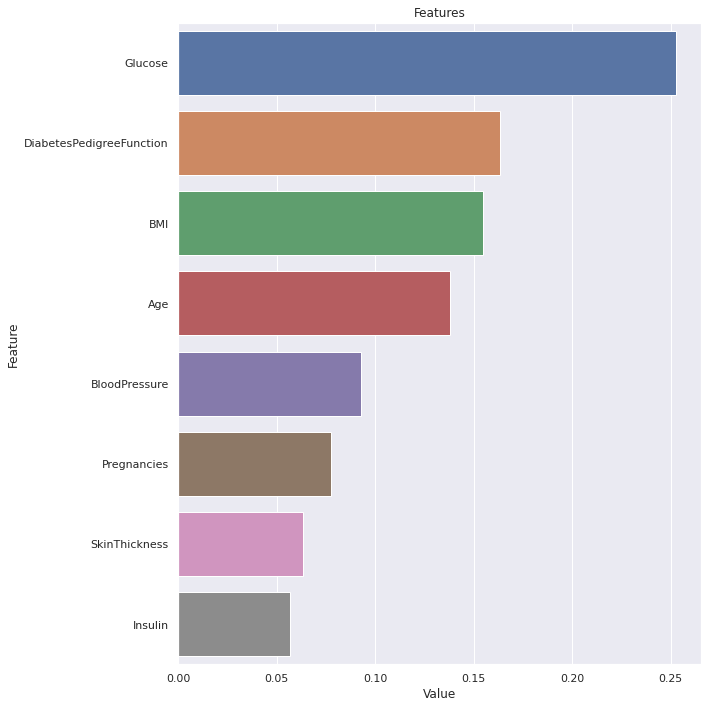

In [78]:
plot_importance(gbm_final, X)

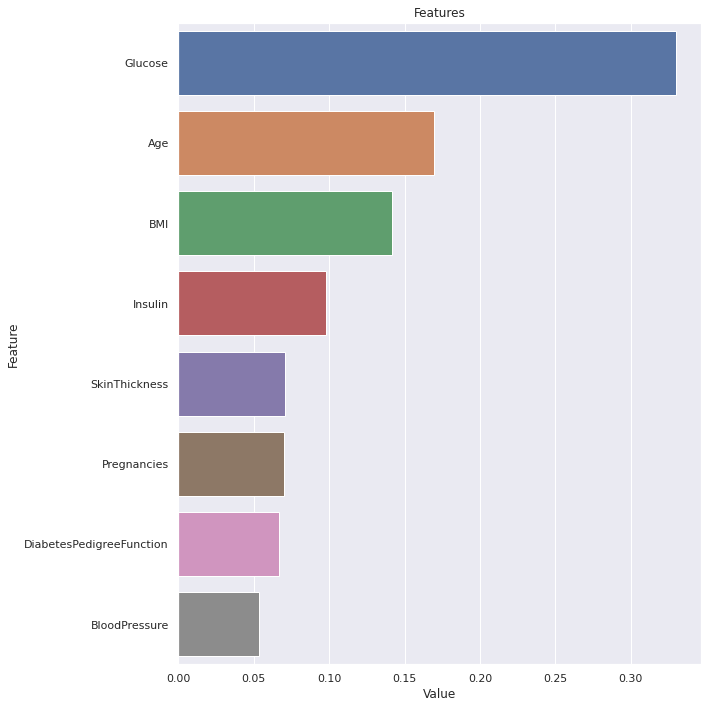

In [79]:
plot_importance(xgboost_final, X)

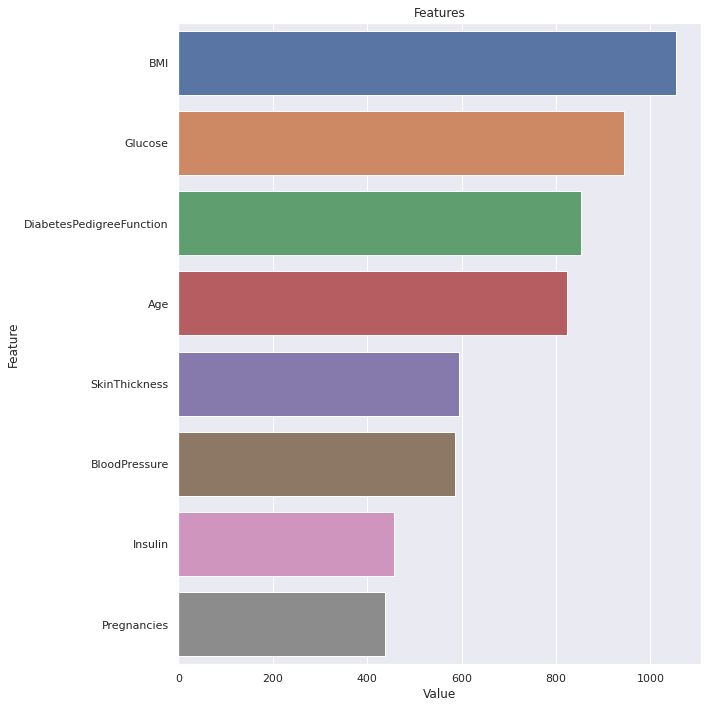

In [80]:
plot_importance(lgbm_final, X)

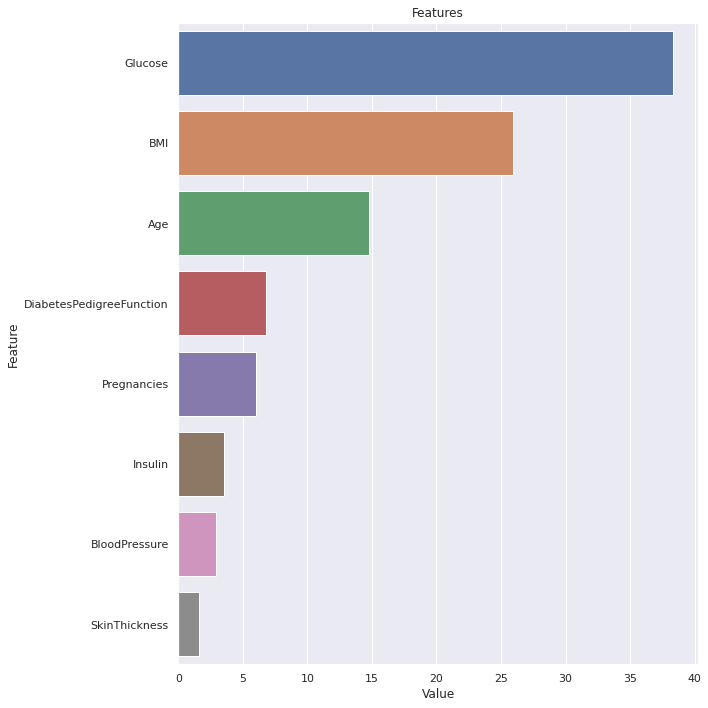

In [81]:
plot_importance(catboost_final, X)

### **Hyperparameter Optimization with RandomSearchCV (BONUS)**

* **GridSearchCV' de verilerin olası bütün kombinasyonlarını dener. RandomSearchCV ise verilecek bir hiperparametre seti içinden rastgele seçimler yapar ve bu rastgele seçimleri arar.**

* **RandomSearchCV, GridSearchCV göre daha hızlı çalışır. Daha geniş bir kümeden rastgele seçimler yapar.**

* **Gidilecek yön bilmiyor ve daha önce algoritma üzerinden detaylı bir çalışma yapılmadıysa, RandomSearchCV ile geniş bir hiperparametre seti üzerinden detaylı bir araştırma yapıp, optimum olarak bulunan hiperparametreleri daha az sayıda yeni değerler koyarak GridSearchCV yönteminden geçirebilirsin.**

In [82]:
rf_model = RandomForestClassifier(random_state=17)

rf_random_params = {"max_depth": np.random.randint(5, 50, 10),
                    "max_features": [3, 5, 7, "auto", "sqrt"],
                    "min_samples_split": np.random.randint(2, 50, 20),
                    "n_estimators": [int(x) for x in np.linspace(start=200, stop=1500, num=10)]}

rf_random = RandomizedSearchCV(estimator=rf_model,
                               param_distributions=rf_random_params,
                               n_iter=100,  # denenecek parametre sayısı
                               cv=3,
                               verbose=True,
                               random_state=42,
                               n_jobs=-1)

rf_random.fit(X, y)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(random_state=17),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'max_depth': array([20, 42, 33, 27, 41, 13, 48, 25,  6, 12]),
                                        'max_features': [3, 5, 7, 'auto',
                                                         'sqrt'],
                                        'min_samples_split': array([15, 47, 30, 20,  8, 24, 33, 29, 29, 36,  5, 10, 42, 26, 18,  6, 34,
       26,  3, 18]),
                                        'n_estimators': [200, 344, 488, 633,
                                                         777, 922, 1066, 1211,
                                                         1355, 1500]},
                   random_state=42, verbose=True)

In [83]:
rf_random.best_params_

{'n_estimators': 200,
 'min_samples_split': 29,
 'max_features': 'auto',
 'max_depth': 12}

In [84]:
rf_random_final = rf_model.set_params(**rf_random.best_params_, random_state=17).fit(X, y)

In [85]:
cv_results = cross_validate(rf_random_final, X, y, cv=5, scoring=["accuracy", "f1", "roc_auc"])

In [86]:
print("test_accuracy", cv_results['test_accuracy'].mean())
print("test_f1", cv_results['test_f1'].mean())
print("test_roc_auc", cv_results['test_roc_auc'].mean())

test_accuracy 0.7656905186316951
test_f1 0.6257933346410907
test_roc_auc 0.8363438155136269


### **Analyzing Model Complexity with Learning Curves (BONUS)**

In [87]:
def val_curve_params(model, X, y, param_name, param_range, scoring="roc_auc", cv=10):
    train_score, test_score = validation_curve(
        model, X=X, y=y, param_name=param_name, param_range=param_range, scoring=scoring, cv=cv)

    mean_train_score = np.mean(train_score, axis=1)
    mean_test_score = np.mean(test_score, axis=1)

    plt.plot(param_range, mean_train_score,
             label="Training Score", color='b')

    plt.plot(param_range, mean_test_score,
             label="Validation Score", color='g')

    plt.title(f"Validation Curve for {type(model).__name__}")
    plt.xlabel(f"Number of {param_name}")
    plt.ylabel(f"{scoring}")
    plt.tight_layout()
    plt.legend(loc='best')
    plt.show(block=True)


rf_val_params = [["max_depth", [5, 8, 15, 20, 30, None]],
                 ["max_features", [3, 5, 7, "auto"]],
                 ["min_samples_split", [2, 5, 8, 15, 20]],
                 ["n_estimators", [10, 50, 100, 200, 500]]]


rf_model = RandomForestClassifier(random_state=17)

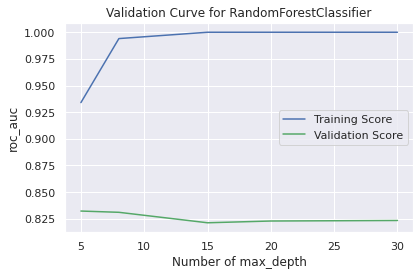

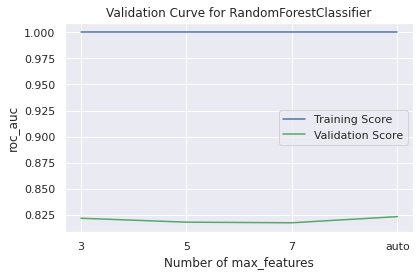

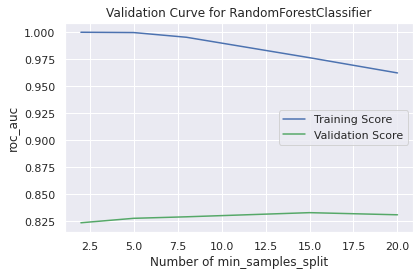

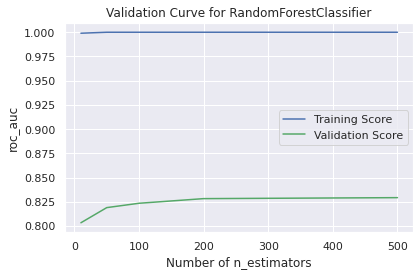

[5, 8, 15, 20, 30, None]

In [88]:
for i in range(len(rf_val_params)):
    val_curve_params(rf_model, X, y, rf_val_params[i][0], rf_val_params[i][1])

rf_val_params[0][1]